# Word Embeddings

### Libraries

In [16]:
# import libraries

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

### Datasets

In [17]:
# load review sentiment data

review_df = pd.read_csv('data/review_sentiment.csv')

review_df

,review_id,text,sentiment
0,LLzom-2TITa4gasV7_fCCA,Great experience purchasing a washer and dryer...,1
1,a5JHzBrWxRd_OmIvV7znDA,Went here based on the high ratings and raves ...,-1
2,X-o--dwf0HuFMittYi4wCA,"oh Millers, how i wanted to like you. You are...",-1
3,INGNbsyo-MouZZzcxnCSGQ,This place gets two stars from me only because...,-1
4,k7VatXVLism-cTDJE8TTUw,"This place was awesome. Clean, beautiful and t...",1
...,...,...,...
11681,IlU-MQzMKc7jAHWwK5VFGQ,"To be fair, I tried them in their first week. ...",0
11682,Qt3BsRvQuJccDQfFWM1XPw,Awful place. It's dirty. Had two birthday part...,-1
11683,3CQQ8Im_UX6QqDECuXYK8A,A truly vegetarian delight! I took a Jewish f...,1
11684,ery1nBM7zKweFLBe-bT5ag,I have a 2011 Toyota Sienna Limited. During th...,-1


### Preprocessing

In [18]:
# preprocess the reviews using gensim

corpus = []
for review in review_df['text']:
    corpus.append(simple_preprocess(review))

In [19]:
# see content of processed reviews

for review in corpus[:5]:
    print('-' * 50)
    print(review)

--------------------------------------------------
['great', 'experience', 'purchasing', 'washer', 'and', 'dryer', 'just', 'bought', 'new', 'home', 'and', 'needed', 'all', 'new', 'appliances', 'iam', 'so', 'glad', 'decided', 'to', 'go', 'even', 'though', 'the', 'reviews', 'were', 'not', 'great', 'which', 'don', 'understand', 'since', 'had', 'no', 'issues', 'whatsoever', 'there', 'was', 'an', 'excellent', 'selection', 'knowledgeable', 'salespeople', 'and', 'timely', 'delivery', 'the', 'level', 'of', 'service', 'we', 'received', 'was', 'beyond', 'expected', 'really', 'felt', 'like', 'they', 'were', 'working', 'hard', 'to', 'give', 'me', 'the', 'best', 'price', 'and', 'offered', 'many', 'options', 'to', 'stay', 'in', 'my', 'budget', 'they', 'even', 'took', 'the', 'time', 'to', 'check', 'if', 'there', 'were', 'any', 'additional', 'sales', 'prices', 'or', 'discounts', 'they', 'could', 'offer', 'me', 'was', 'given', 'honest', 'feedback', 'and', 'all', 'of', 'my', 'questions', 'were', 'answer

### Dense embeddings

In [20]:
# documents representing reviews

documents = corpus

len(documents)

11686

In [21]:
# see contents of documents

print(documents[0])

['great', 'experience', 'purchasing', 'washer', 'and', 'dryer', 'just', 'bought', 'new', 'home', 'and', 'needed', 'all', 'new', 'appliances', 'iam', 'so', 'glad', 'decided', 'to', 'go', 'even', 'though', 'the', 'reviews', 'were', 'not', 'great', 'which', 'don', 'understand', 'since', 'had', 'no', 'issues', 'whatsoever', 'there', 'was', 'an', 'excellent', 'selection', 'knowledgeable', 'salespeople', 'and', 'timely', 'delivery', 'the', 'level', 'of', 'service', 'we', 'received', 'was', 'beyond', 'expected', 'really', 'felt', 'like', 'they', 'were', 'working', 'hard', 'to', 'give', 'me', 'the', 'best', 'price', 'and', 'offered', 'many', 'options', 'to', 'stay', 'in', 'my', 'budget', 'they', 'even', 'took', 'the', 'time', 'to', 'check', 'if', 'there', 'were', 'any', 'additional', 'sales', 'prices', 'or', 'discounts', 'they', 'could', 'offer', 'me', 'was', 'given', 'honest', 'feedback', 'and', 'all', 'of', 'my', 'questions', 'were', 'answered', 'am', 'very', 'happy', 'with', 'sears', 'and',

In [22]:
# model training

model = Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)

In [23]:
# embeddings

model.wv.get_vector("good")

array([ 0.03727848, -0.22462687,  0.06164508,  0.3662258 ,  0.26775795,
        0.0949092 ,  0.33315012,  0.08703592, -0.31017822, -0.09601659,
       -0.0345335 , -0.28154746, -0.23863763,  0.49955168, -0.3348116 ,
       -0.0690914 ,  0.09672657,  0.09617839,  0.01219174, -0.15871102,
        0.22455214, -0.3606065 ,  0.11819144,  0.49199897, -0.18650632,
       -0.01891272, -0.2055627 ,  0.11916728, -0.08187222, -0.23131824,
       -0.08752682,  0.03381372,  0.01548811,  0.04684589,  0.11016046,
       -0.08134802,  0.13251714, -0.2343207 , -0.04932792, -0.27357253,
       -0.11048202,  0.19680564, -0.36467218,  0.03878137,  0.2800511 ,
        0.17159954,  0.03488294, -0.22608729, -0.06888847,  0.19337998,
       -0.2834905 ,  0.40472472,  0.20542362,  0.03928608,  0.01452966,
        0.07789407,  0.24326362, -0.05343039, -0.00359046, -0.1449768 ,
        0.3081016 , -0.20754522,  0.05652031,  0.03468379,  0.0912493 ,
       -0.08596721,  0.24058227,  0.06047442, -0.20332696, -0.17

In [24]:
# similarity

model.wv.most_similar(positive="good")

[('underwhelming', 0.7523173093795776),
 ('tasty', 0.7322449088096619),
 ('decent', 0.7235148549079895),
 ('decently', 0.7166332602500916),
 ('satisfying', 0.7156621217727661),
 ('definite', 0.7154306173324585),
 ('paninis', 0.7116918563842773),
 ('great', 0.711249053478241),
 ('eaters', 0.7064165472984314),
 ('darn', 0.7053967714309692)]

In [25]:
# similarity

model.wv.most_similar(positive="bad")

[('wowed', 0.6551146507263184),
 ('deducted', 0.6418485641479492),
 ('terribly', 0.6349087357521057),
 ('lousy', 0.6336261034011841),
 ('blows', 0.6281378865242004),
 ('memorable', 0.6212449073791504),
 ('necessarily', 0.6205263137817383),
 ('bizarre', 0.6186093091964722),
 ('sucked', 0.6180410981178284),
 ('horrible', 0.6178065538406372)]

In [26]:
# save full model (including trainable vectors to resume training)

model.save("embeddings/reviews_model")

In [27]:
# save model word vectors

model.wv.save("embeddings/reviews_wv")

### Vector visualization

In [28]:
def reduce_dimensions(model, num_dimensions=2, words=[]):
    '''
    Reduce the dimensions of the word vectors using t-SNE for plotting
    '''
    vectors = []
    labels = []
    if (words == []):
        words = model.wv.index_to_key
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=4.0)
    vectors = tsne.fit_transform(vectors)
    return vectors, labels

In [29]:
def plot_word_vectors(x_vals, y_vals, labels, words=[]):
    '''
    Plot the reduced dimensions of the word vectors using matplotlib
    '''
    random.seed(0)
    x_vals_new = np.array([])
    y_vals_new = np.array([])
    labels_new = np.array([])
    if(words == []):
        x_vals_new = x_vals
        y_vals_new = y_vals
        labels_new = labels
    else:
        for i in range(len(labels)):
            if(labels[i] in words):
                x_vals_new = np.append(x_vals_new,x_vals[i])
                y_vals_new = np.append(y_vals_new,y_vals[i])
                labels_new = np.append(labels_new,labels[i])
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals_new, y_vals_new)
    for i in range(len(labels_new)):
        plt.annotate(labels_new[i], (x_vals_new[i], y_vals_new[i]))
    plt.show()

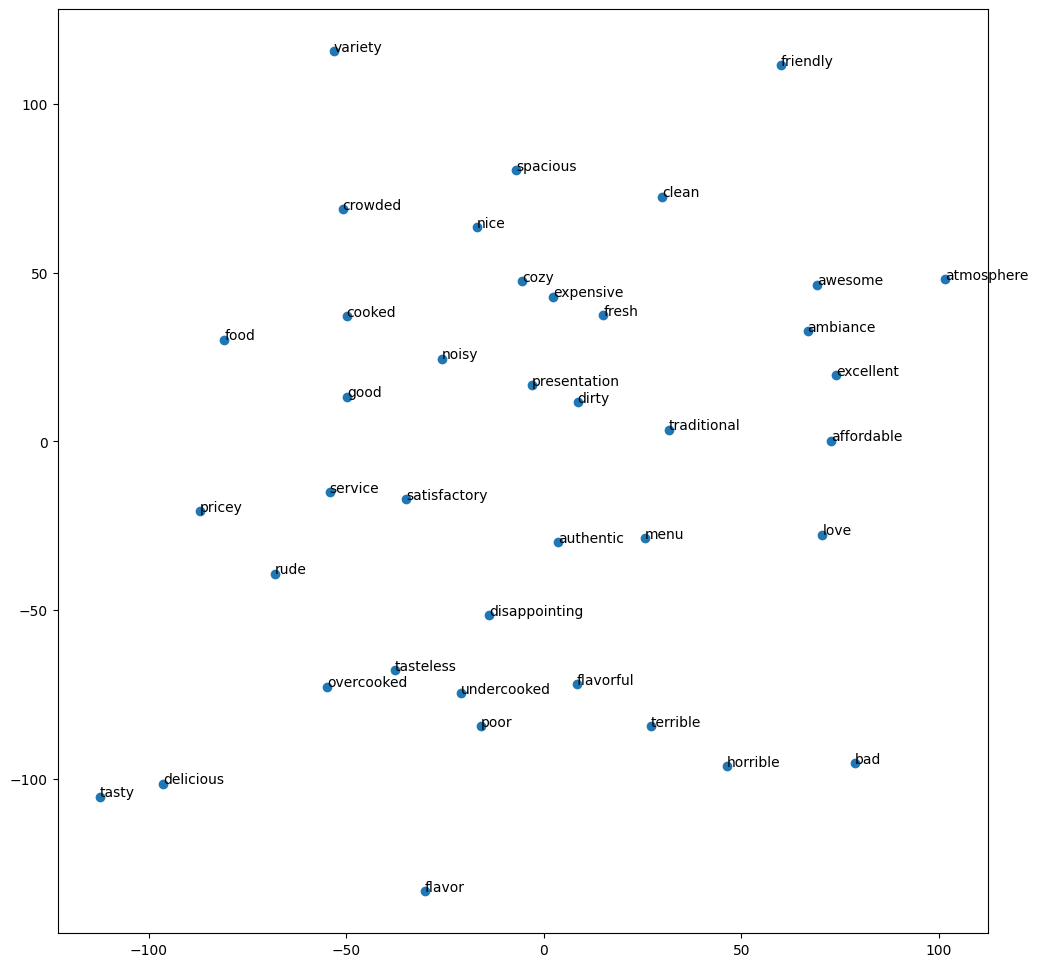

In [30]:
# visualize word vectors

all_words = [word for doc in documents for word in doc]
words = random.sample(all_words, 50)
interesting_words = ['good', 'bad', 'excellent', 'poor', 'awesome', 'terrible', 'nice', 'horrible', 'satisfactory', 'food', 'delicious', 'tasty', 'disappointing', 'service', 'ambiance', 'atmosphere', 'pricey', 'presentation', 'menu', 'variety', 'fresh', 'cooked', 'flavorful', 'tasteless', 'overcooked', 'undercooked', 'friendly', 'rude', 'clean', 'dirty', 'crowded', 'spacious', 'cozy', 'noisy', 'expensive', 'affordable', 'authentic', 'traditional', 'flavor', 'love']

vectors, labels = reduce_dimensions(model, 3, interesting_words)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plot_word_vectors(x_vals, y_vals, labels, interesting_words)
